# Exercise 08: Predicting credit risk

The data: UCI Machine Learning Repository - Credit Card Default Data: This dataset contains information on default payments, demographic factors, credit data, and payment history for 30,000 credit card holders in Taiwan. It can be found here: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients



Data Set Information (from the data source):

Attribute Information:

Y: default payment next month (Yes = 1, No = 0), is the response variable.

Explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

## Exercises

In this exercise, use the dataset of Credit Card Default Data and try to build a random forest model to predict which ones are likely to default.

1. Start by exploring the data, cleaning it if necessary
2. Build and train a decision tree model to predict whether a credit card holder will default or not
3. Build and train a random forest model to predict whether a credit card holder will default or not
4. Evaluate the model's performance using appropriate evaluation metrics, and try to identify any important features that the model is using to make predictions

In [2]:
# Exerciese 1

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Credit Card Default Data
df = pd.read_excel('../../data/credit_risk/default_of_credit_card_clients.xls', header=1)

# Drop the ID column as it is not useful for modeling
df.drop('ID', axis=1, inplace=True)

# Rename the target column to 'default' for clarity
df.rename(columns={'default payment next month': 'default'}, inplace=True)

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['SEX', 'EDUCATION', 'MARRIAGE'])

df

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,1,0,0,0,0,0,1,0,0
1,120000,26,-1,2,0,0,0,2,2682,1725,...,0,1,0,0,0,0,0,0,1,0
2,90000,34,0,0,0,0,0,0,29239,14027,...,0,1,0,0,0,0,0,0,1,0
3,50000,37,0,0,0,0,0,0,46990,48233,...,0,1,0,0,0,0,0,1,0,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,0,0,0,0,0,0,188948,192815,...,0,0,1,0,0,0,0,1,0,0
29996,150000,43,-1,-1,-1,-1,0,0,1683,1828,...,0,0,1,0,0,0,0,0,1,0
29997,30000,37,4,3,2,-1,0,0,3565,3356,...,0,1,0,0,0,0,0,0,1,0
29998,80000,41,1,-1,0,0,0,-1,-1645,78379,...,0,0,1,0,0,0,0,1,0,0


In [3]:
# Split the data into training and testing sets
X = df.drop('default', axis=1)
y = df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [4]:
# Exercise 2

from sklearn.tree import DecisionTreeClassifier

# Initialize a decision tree classifier with default parameters
dtc = DecisionTreeClassifier()

# Fit the model to the training data
dtc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dtc = dtc.predict(X_test)

# Calculate the accuracy of the model
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print(f"Accuracy: {accuracy_dtc}")

Accuracy: 0.7226666666666667


In [5]:
X_train

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
12614,530000,39,0,0,0,0,0,0,398763,396324,...,0,1,0,0,0,0,0,0,1,0
5357,270000,27,-1,-1,-1,0,-1,-1,2016,1183,...,1,0,0,0,0,0,0,0,1,0
4020,50000,23,0,0,0,0,0,0,49798,50795,...,0,1,0,0,0,0,0,0,1,0
24851,200000,41,-1,-1,-1,2,0,-1,1980,1802,...,1,0,0,0,0,0,0,1,0,0
23961,50000,25,0,0,0,0,0,0,46980,47809,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18898,140000,28,0,0,-1,0,0,0,108018,6500,...,0,0,0,0,1,0,0,0,1,0
11798,50000,27,0,0,0,0,0,0,28387,36276,...,1,0,0,0,0,0,0,0,1,0
6637,610000,30,0,0,0,0,0,0,50724,8723,...,0,1,0,0,0,0,0,1,0,0
2575,180000,48,0,0,0,0,0,0,167140,160707,...,1,0,0,0,0,0,0,1,0,0


In [6]:
# Exercise 3

# Initialize a random forest classifier with default parameters
rfc = RandomForestClassifier()

# Fit the model to the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rfc = rfc.predict(X_test)

# Calculate the accuracy of the model
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print(f"Accuracy: {accuracy_rfc}")

Accuracy: 0.8173333333333334


In [7]:
# Exercise 4

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the accuracy of the random forest (TP + TN) / (TP + TN + FP + FN)
accuracy = accuracy_score(y_test, y_pred_rfc)
print("Accuracy:", accuracy)

# Calculate the precision of the random forest (TP /(TP+ FP))
precision = precision_score(y_test, y_pred_rfc)
print("Precision:", precision)

# Calculate the recall of the random forest (TP /(TP+ FN))
recall = recall_score(y_test, y_pred_rfc)
print("Recall:", recall)

# Calculate the F1 score of the random forest (2 * precision * recall / (precision + recall))
f1 = f1_score(y_test, y_pred_rfc)
print("F1:", f1)

Accuracy: 0.8173333333333334
Precision: 0.655417406749556
Recall: 0.37011033099297896
F1: 0.4730769230769231


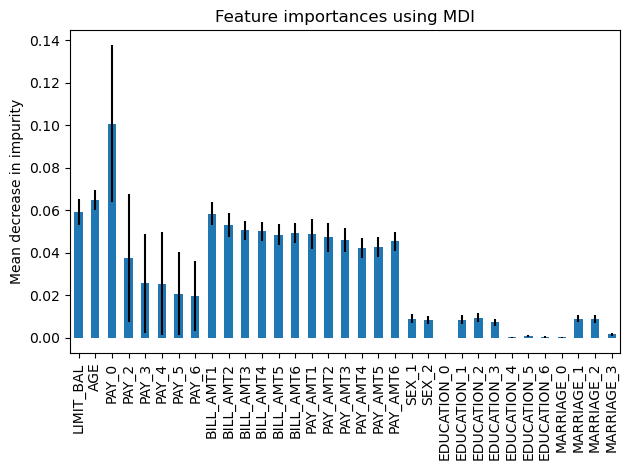

In [8]:
# see https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

import numpy as np

importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)

import pandas as pd
import matplotlib.pyplot as plt

forest_importances = pd.Series(importances, X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()